In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix


In [3]:
X_train = pd.read_csv('../Data/X_train.csv')
y_train = pd.read_csv('../Data/y_train.csv')

#removing any categorical features
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical features: {categorical_features}")

X_train_encoded = X_train.copy()
label_encoders = {}
for col in categorical_features:
    if col != 'User_ID':
        le = LabelEncoder()
        X_train_encoded[col] = le.fit_transform(X_train[col])
        label_encoders[col] = le

if 'User_ID' in X_train_encoded.columns:
    X_train_encoded = X_train_encoded.drop('User_ID', axis=1)

print("Categorical features encoded.")

y_train_encoded = y_train.values.ravel()

Categorical features: ['User_ID', 'Gender', 'Social_Media_Platform']
Categorical features encoded.


In [5]:
#training and optimizing the random forest model
rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=kf, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train_encoded, y_train_encoded)
best_rf = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
y_train_pred = best_rf.predict(X_train_encoded)
mse = mean_squared_error(y_train_encoded, y_train_pred)
r2 = r2_score(y_train_encoded, y_train_pred)
print(f"Training MSE: {mse}")
print(f"Training R^2: {r2}")


Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Training MSE: 0.2567860913939289
Training R^2: 0.89207834351713


In [9]:
#evaluating performance of random forest model
start_time = time()
best_rf.fit(X_train_encoded, y_train_encoded)
end_time = time()
rf_accuracy = best_rf.score(X_train_encoded, y_train_encoded)
rf_training_time = end_time - start_time #keeping it in seconds
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Random Forest Training Time (seconds): {rf_training_time}")

Random Forest Accuracy: 0.89207834351713
Random Forest Training Time (seconds): 0.3688468933105469


Feature importances:
Stress_Level(1-10)           0.398939
Daily_Screen_Time(hrs)       0.337071
Sleep_Quality(1-10)          0.095985
Age                          0.063874
Days_Without_Social_Media    0.037296
Exercise_Frequency(week)     0.029155
Social_Media_Platform        0.026288
Gender                       0.011391
dtype: float64


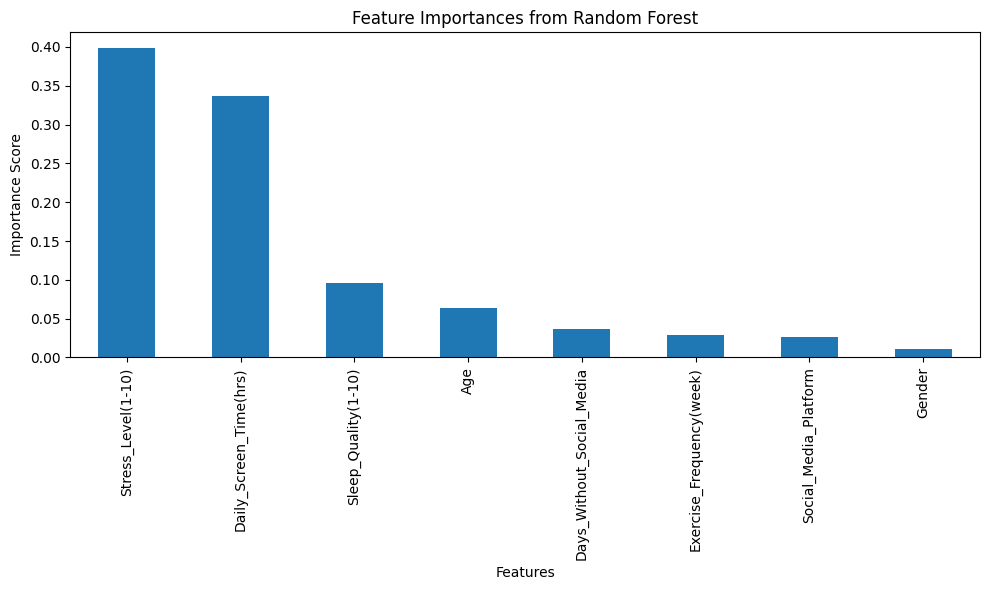

In [10]:
#feature importance 
importances = best_rf.feature_importances_
feature_names = X_train_encoded.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("Feature importances:")
print(feature_importances)  
# Plotting feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances from Random Forest')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.tight_layout()
plt.show() 